In [2]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as mp
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('Downloads/AirPassengers.csv', parse_dates=True, index_col="Month")

In [4]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
df = df.rename(columns={"#Passengers": "passengers"})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

<AxesSubplot:xlabel='Month'>

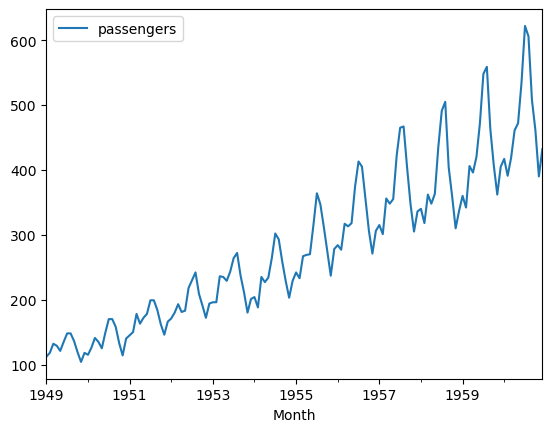

In [8]:
df.plot()

In [9]:
def stationarity_with_adfuller_checker(series: list) ->str :
    adfuller_test = adfuller(series)
    adf_value = adfuller_test[0]
    critical_value = adfuller_test[4]["5%"]

    print(f"ADF value is {adf_value}")
    print(f"Critical value is {critical_value}")

    if adf_value < critical_value:
        print("Rejecting the Null Hypothesis, So the Time-Series is Stationary")
    else:
        print("Not Rejcting the Null Hypothesis, So the Time-Series is Non-Stationary")

In [10]:
# The Time-Series is not-stationary
stationarity_with_adfuller_checker(df['passengers'])

ADF value is 0.8153688792060498
Critical value is -2.8840418343195267
Not Rejcting the Null Hypothesis, So the Time-Series is Non-Stationary


#### Stationary Time-Series will have a constant mean, constant variance and constant autocorrelation.Constant Mean, 
#### when there is no trend in the time-series data.Constant Variance.
#### when there is no seasonality in the time-series data.

            passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


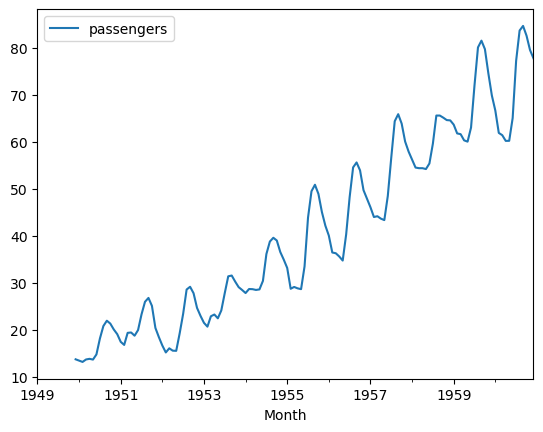

In [11]:
### Variance of the Default Time Series data, which has a changing variance

print(df.rolling(window=12).std())
df_variance_of_each_year = df.rolling(window=12).std().plot()

## Tranformation for converting the time series to constant variance

## 1.Log Transformation

In [12]:
log_tranformed_df = df['passengers'].apply(lambda dp: np.log(dp))

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.171453
1960-09-01    0.174172
1960-10-01    0.169804
1960-11-01    0.160923
1960-12-01    0.156660
Name: passengers, Length: 144, dtype: float64


<AxesSubplot:xlabel='Month'>

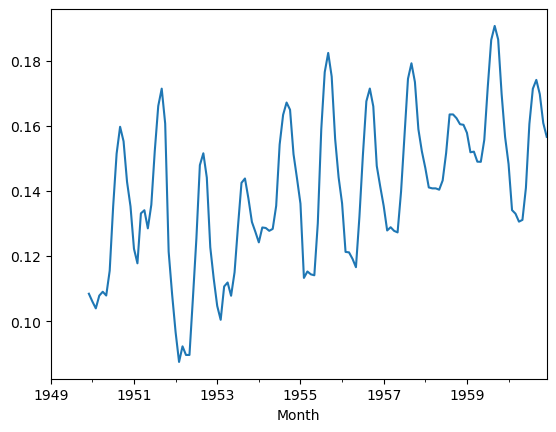

In [13]:
# Variance of log transformed time series

print(log_tranformed_df.rolling(window=12).std())
log_tranformed_df.rolling(window=12).std().plot()

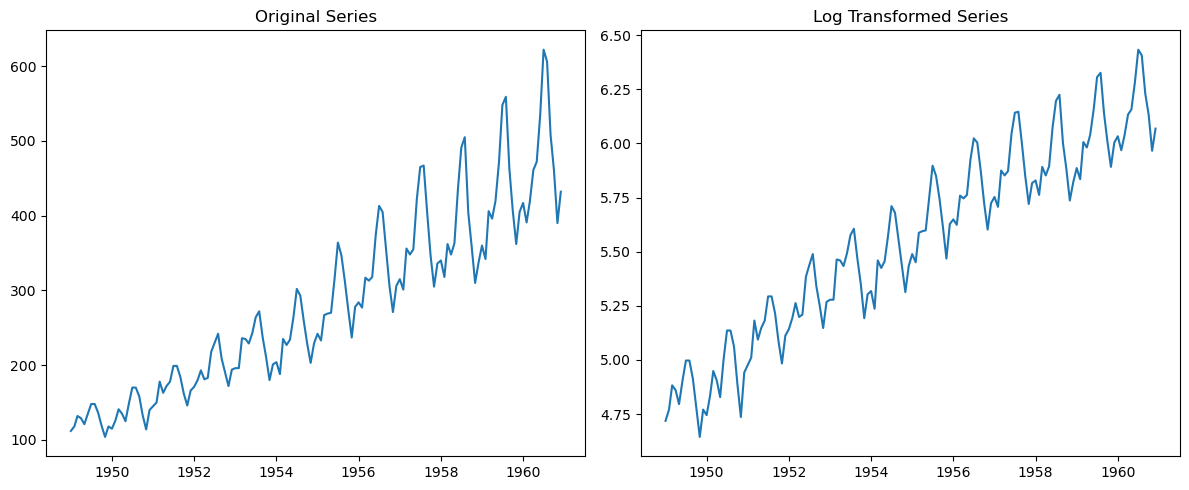

In [14]:
fig, ax = mp.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [20, 20]}, figsize=(12, 5))
ax[0].set_title("Original Series")
ax[1].set_title("Log Transformed Series")
ax[0].plot(df['passengers'])
ax[1].plot(log_tranformed_df)
fig.tight_layout()

## 2.power Transformation:

In [15]:
power_tranformed_df = df['passengers'].apply(lambda dp: dp ** .5)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    1.887832
1960-09-01    1.914036
1960-10-01    1.866281
1960-11-01    1.784093
1960-12-01    1.740673
Name: passengers, Length: 144, dtype: float64


<AxesSubplot:xlabel='Month'>

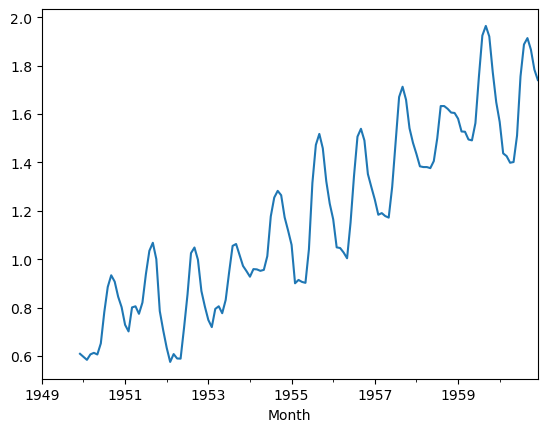

In [16]:
print(power_tranformed_df.rolling(window=12).std())
power_tranformed_df.rolling(window=12).std().plot()

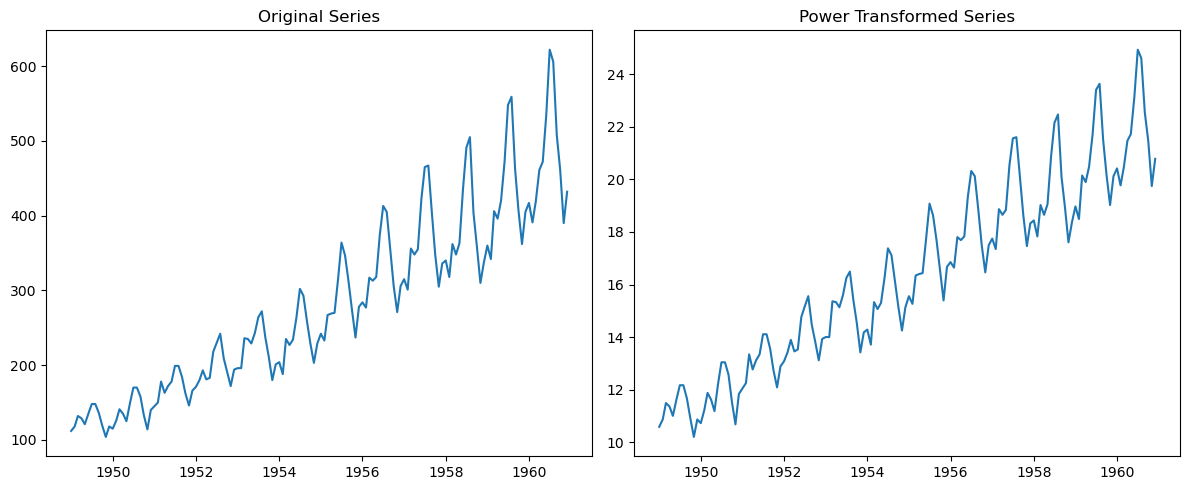

In [17]:
fig, ax = mp.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [20, 20]}, figsize=(12, 5))
ax[0].set_title("Original Series")
ax[1].set_title("Power Transformed Series")
ax[0].plot(df['passengers'])
ax[1].plot(power_tranformed_df)
fig.tight_layout()

## 3.Squareroot transformation:

In [18]:
sqrt_tranformed_df = df['passengers'].apply(lambda dp: np.sqrt(dp))

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    1.887832
1960-09-01    1.914036
1960-10-01    1.866281
1960-11-01    1.784093
1960-12-01    1.740673
Name: passengers, Length: 144, dtype: float64


<AxesSubplot:xlabel='Month'>

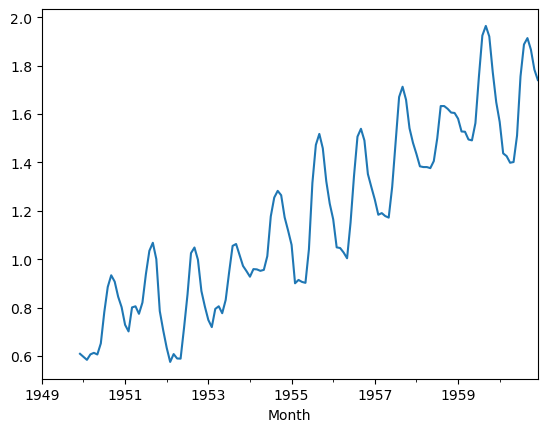

In [19]:
print(sqrt_tranformed_df.rolling(window=12).std())
sqrt_tranformed_df.rolling(window=12).std().plot()

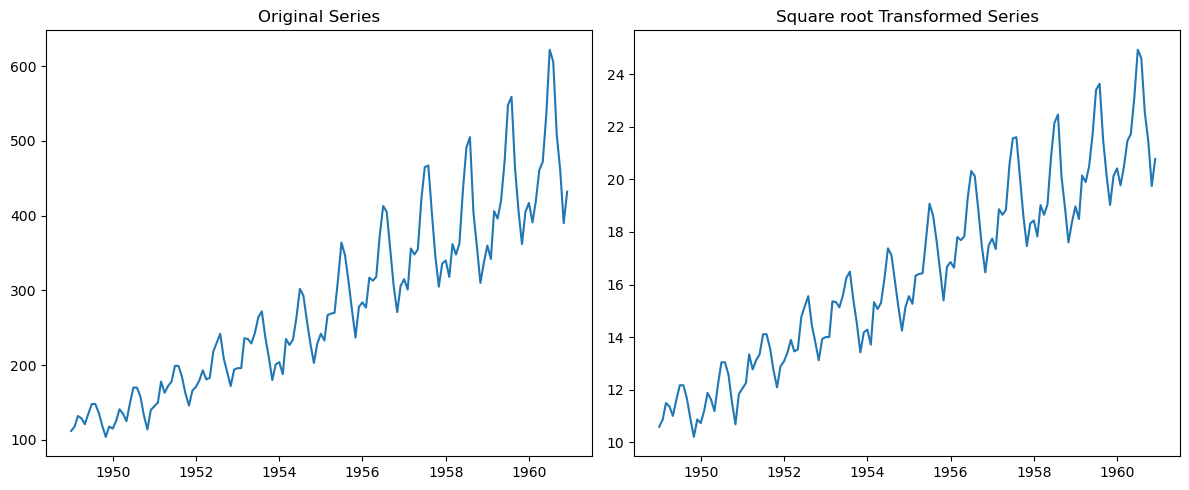

In [20]:
fig, ax = mp.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [20, 20]}, figsize=(12, 5))
ax[0].set_title("Original Series")
ax[1].set_title("Square root Transformed Series")
ax[0].plot(df['passengers'])
ax[1].plot(sqrt_tranformed_df)
fig.tight_layout()

# To remove the Trend in the series, we will use the Sliding Window Function(Detrending) and linear regression

## 1. Sliding Window Function with Original Time Series

In [21]:
# Find the mean with the sliding window of frequency of the data. And Take a difference from the series and mean of sliding window

<AxesSubplot:xlabel='Month'>

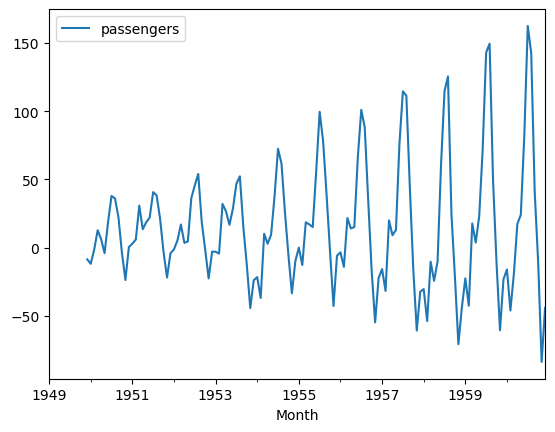

In [22]:
rolling_mean = df.rolling(window=12).mean()
detrend_with_original_series = df - rolling_mean
detrend_with_original_series.plot()

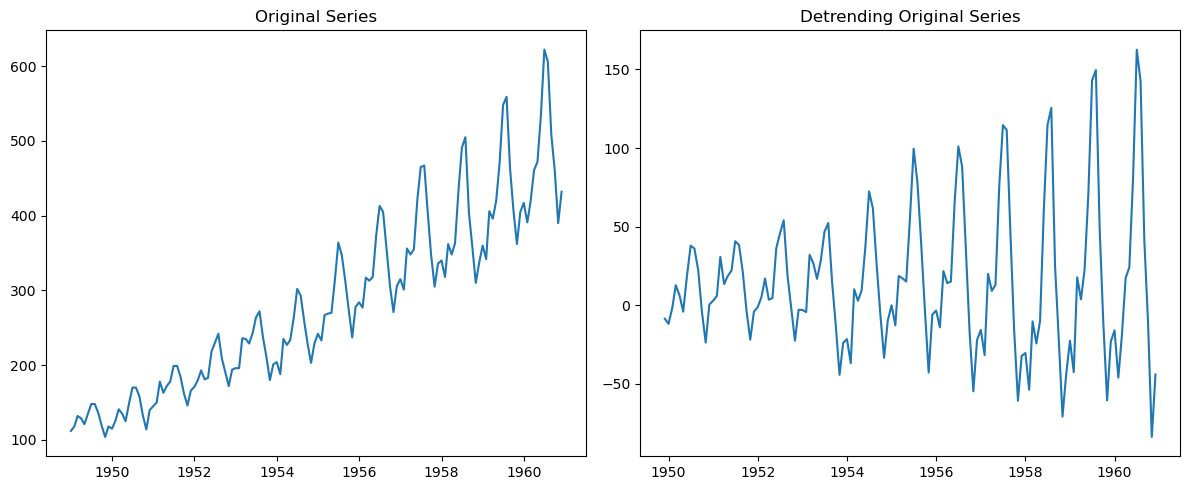

In [23]:
fig, ax = mp.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [20, 20]}, figsize=(12, 5))
ax[0].set_title("Original Series")
ax[1].set_title("Detrending Original Series")
ax[0].plot(df['passengers'])
ax[1].plot(detrend_with_original_series)
fig.tight_layout()

<AxesSubplot:xlabel='Month'>

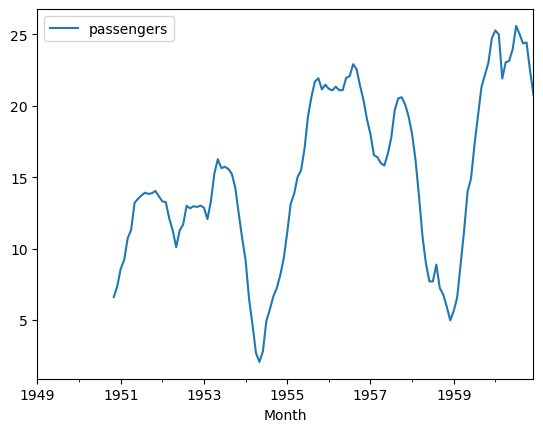

In [24]:
# Mean of the detrend original series

detrend_with_original_series.rolling(window=12).mean().plot()

## 2. Sliding Window Function with Power Tranformed Data:

<AxesSubplot:xlabel='Month'>

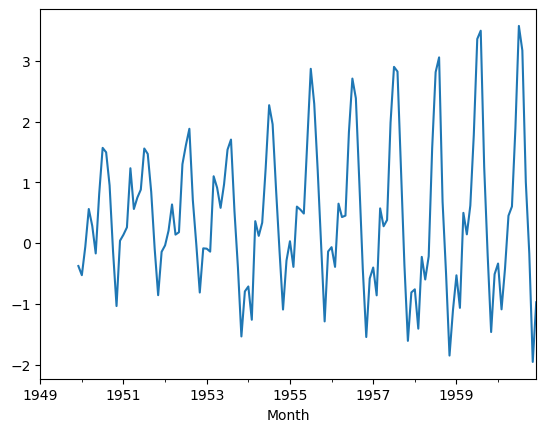

In [25]:
rolling_mean = power_tranformed_df.rolling(window=12).mean()
detrend_with_power_transformed_series = power_tranformed_df - rolling_mean
detrend_with_power_transformed_series.plot()

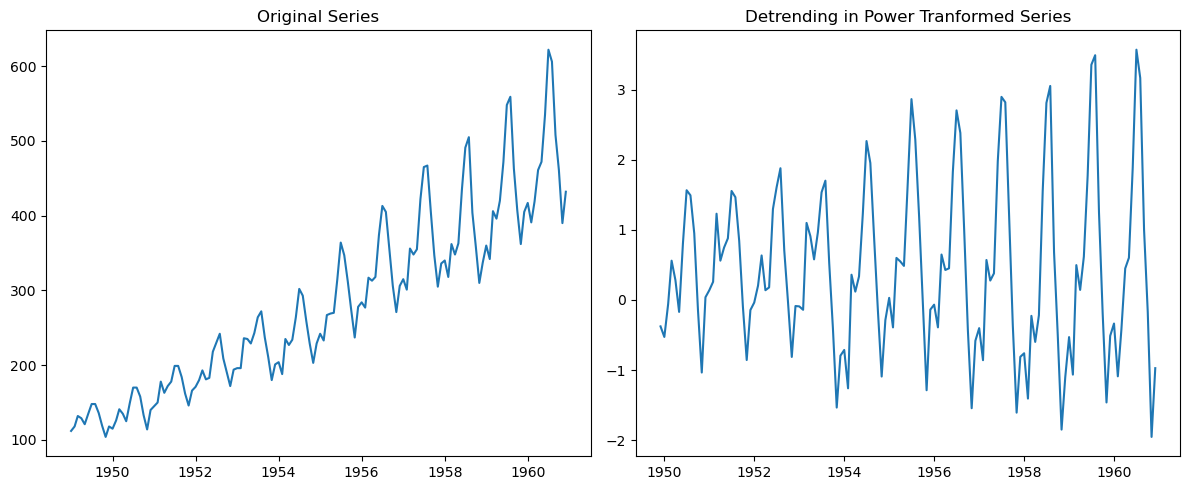

In [26]:
fig, ax = mp.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [20, 20]}, figsize=(12, 5))
ax[0].set_title("Original Series")
ax[1].set_title("Detrending in Power Tranformed Series")
ax[0].plot(df['passengers'])
ax[1].plot(detrend_with_power_transformed_series)
fig.tight_layout()

<AxesSubplot:xlabel='Month'>

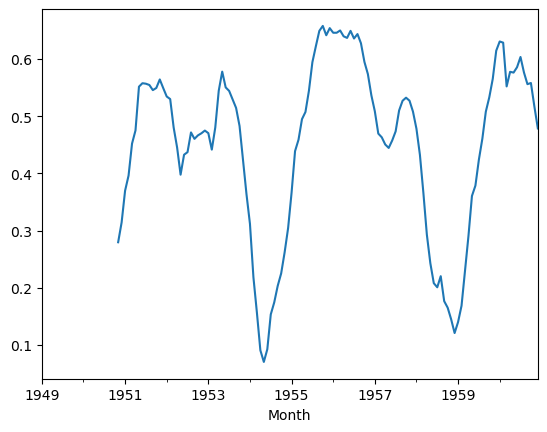

In [27]:
# Mean of the detrend power transformed series

detrend_with_power_transformed_series.rolling(window=12).mean().plot()

## 3. Sliding Window Function with the Log Tranformed Series

<AxesSubplot:xlabel='Month'>

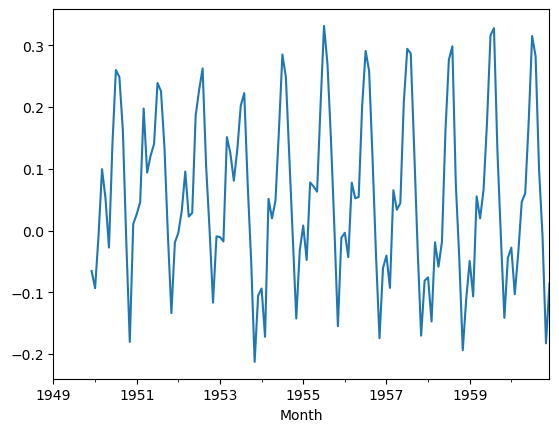

In [28]:
rolling_mean = log_tranformed_df.rolling(window=12).mean()
detrend_with_log_transformed_series = log_tranformed_df - rolling_mean
detrend_with_log_transformed_series.plot()

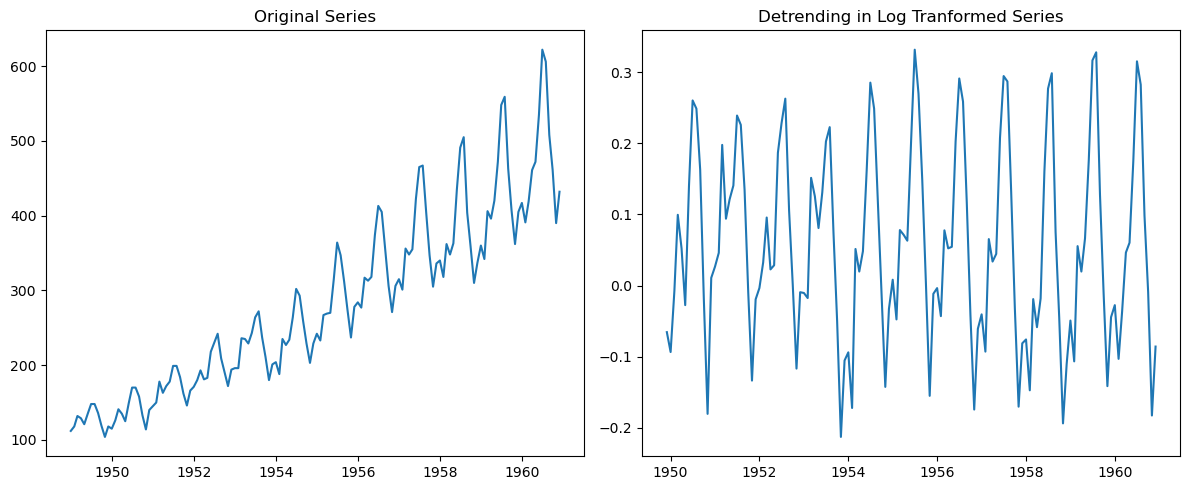

In [29]:
fig, ax = mp.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [20, 20]}, figsize=(12, 5))
ax[0].set_title("Original Series")
ax[1].set_title("Detrending in Log Tranformed Series")
ax[0].plot(df['passengers'])
ax[1].plot(detrend_with_log_transformed_series)
fig.tight_layout()

<AxesSubplot:xlabel='Month'>

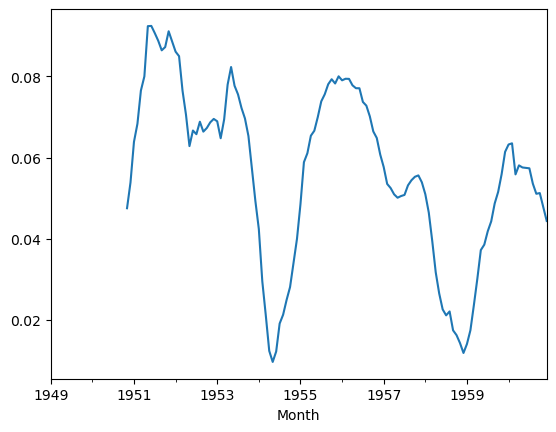

In [30]:
# Mean of the detrend log transformed series

detrend_with_log_transformed_series.rolling(window=12).mean().plot()

## 4. Detrend with the Square Root Transformed Series

<AxesSubplot:xlabel='Month'>

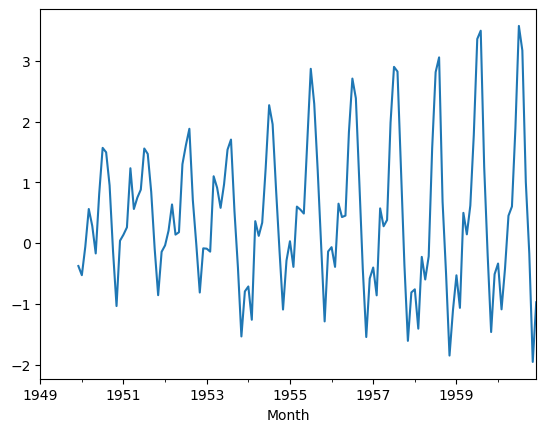

In [31]:
rolling_mean = sqrt_tranformed_df.rolling(window=12).mean()
detrend_with_sqrt_transformed_series = sqrt_tranformed_df - rolling_mean
detrend_with_sqrt_transformed_series.plot()

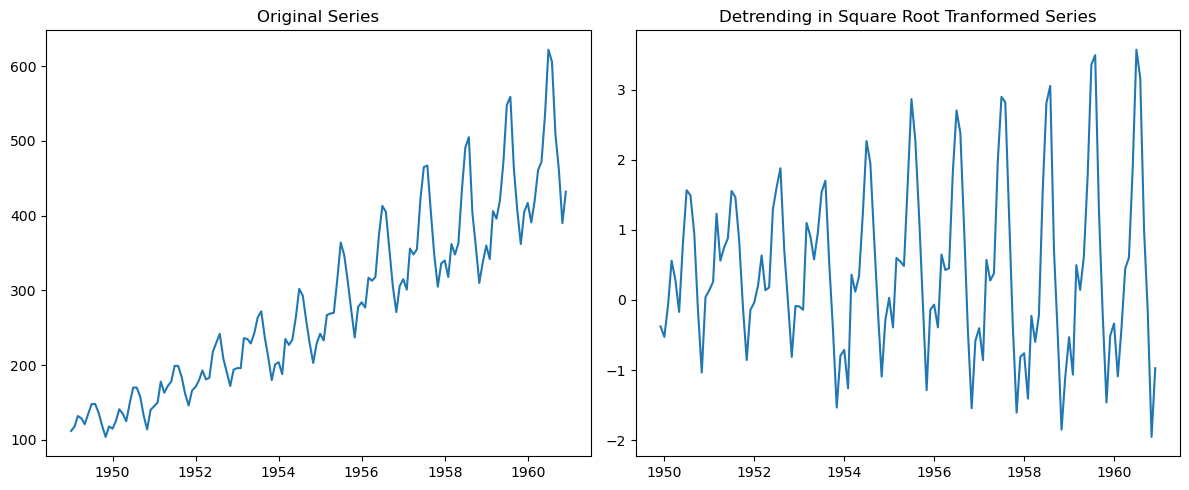

In [32]:
fig, ax = mp.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [20, 20]}, figsize=(12, 5))
ax[0].set_title("Original Series")
ax[1].set_title("Detrending in Square Root Tranformed Series")
ax[0].plot(df['passengers'])
ax[1].plot(detrend_with_sqrt_transformed_series)
fig.tight_layout()

<AxesSubplot:xlabel='Month'>

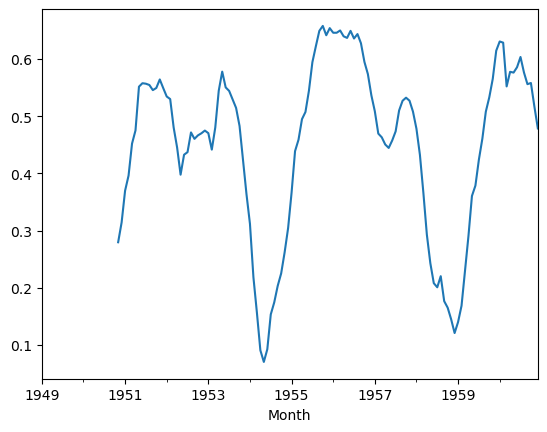

In [33]:
# Mean of the detrend Square Root transformed series

detrend_with_sqrt_transformed_series.rolling(window=12).mean().plot()

## Linear Regression for detrending the original data

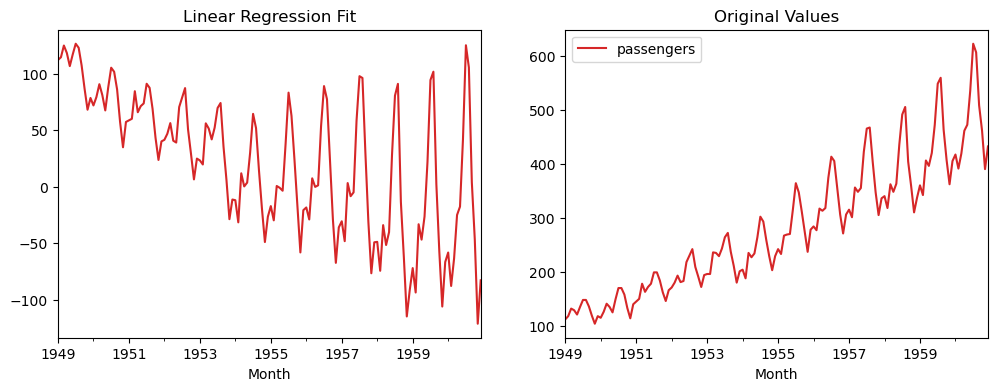

In [34]:
from statsmodels.regression.linear_model import OLS

least_squares = OLS(df["passengers"].values, list(range(df.shape[0])))
result = least_squares.fit()

fit = pd.Series(result.predict(list(range(df.shape[0]))), index = df.index)

passengers_ols_detrended = df["passengers"] - fit


ax1 = mp.subplot(121)
passengers_ols_detrended.plot(figsize=(12,4), color="tab:red", title="Linear Regression Fit", ax=ax1);
ax2 = mp.subplot(122)
df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

<AxesSubplot:xlabel='Month'>

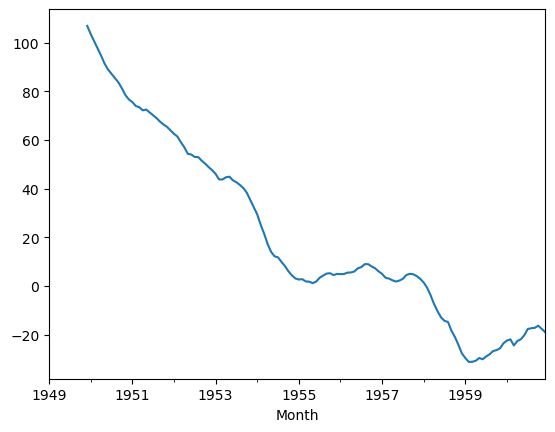

In [35]:
# Mean of the Linear Regression detrend

passengers_ols_detrended.rolling(window=12).mean().plot()

## Removing the Seasonality

# 1. Differencing over the Log Transformed time series

In [36]:
log_transformed_with_differencing = log_tranformed_df - log_tranformed_df.shift()
log_transformed_with_differencing.dropna(inplace=True)

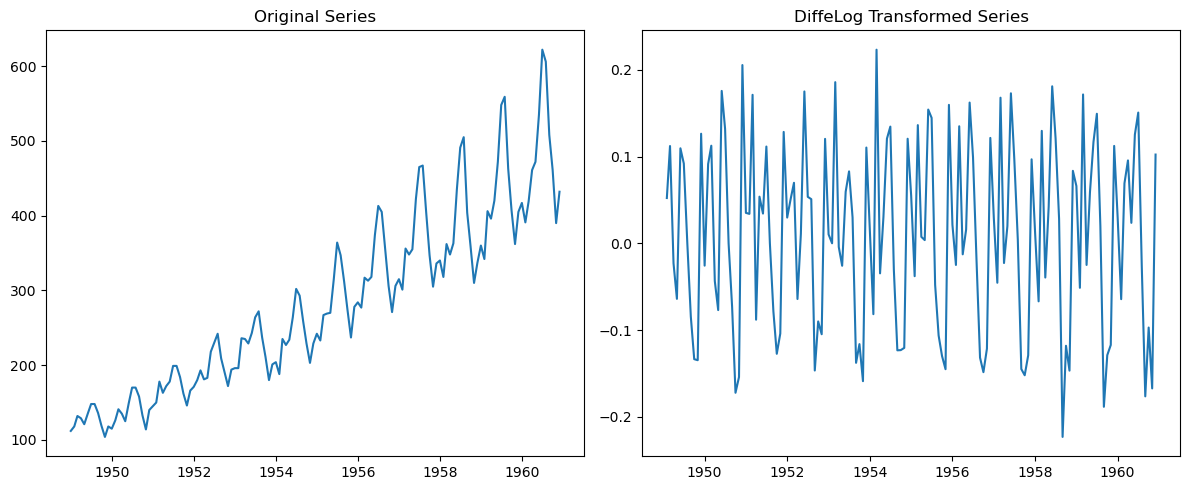

In [37]:
fig, ax = mp.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [20, 20]}, figsize=(12, 5))
ax[0].set_title("Original Series")
ax[1].set_title("DiffeLog Transformed Series")
ax[0].plot(df['passengers'])
ax[1].plot(log_transformed_with_differencing)
fig.tight_layout()

In [38]:
stationarity_with_adfuller_checker(log_transformed_with_differencing)

ADF value is -2.717130598388114
Critical value is -2.884397984161377
Not Rejcting the Null Hypothesis, So the Time-Series is Non-Stationary


## Differecing in Power Transformed Time-Series

In [39]:
power_transformed_with_differencing = power_tranformed_df - power_tranformed_df.shift()
power_transformed_with_differencing.dropna(inplace=True)

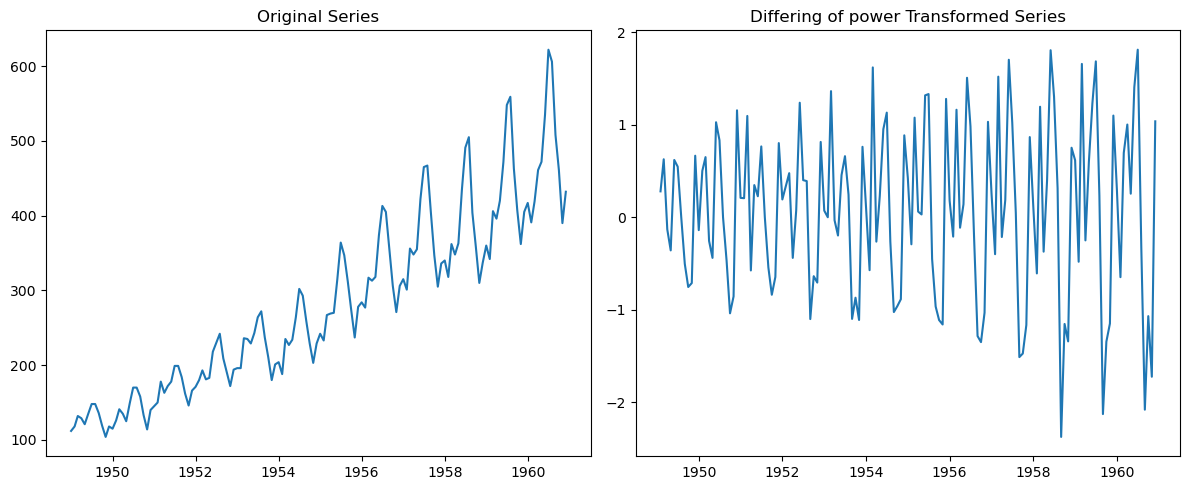

In [40]:
fig, ax = mp.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [20, 20]}, figsize=(12, 5))
ax[0].set_title("Original Series")
ax[1].set_title("Differing of power Transformed Series")
ax[0].plot(df['passengers'])
ax[1].plot(power_transformed_with_differencing)
fig.tight_layout()

In [41]:
stationarity_with_adfuller_checker(power_transformed_with_differencing)

ADF value is -3.1864222911641904
Critical value is -2.8840418343195267
Rejecting the Null Hypothesis, So the Time-Series is Stationary


## Differencing in Square Root Transformed Time-Series

In [42]:
sqrt_transformed_with_differencing = sqrt_tranformed_df - sqrt_tranformed_df.shift()
sqrt_transformed_with_differencing.dropna(inplace=True)

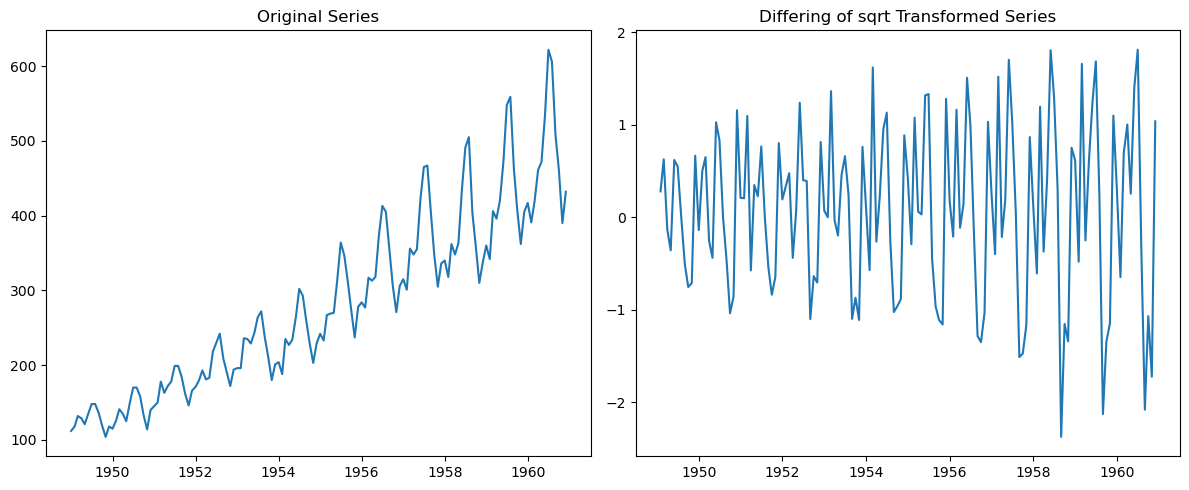

In [43]:
fig, ax = mp.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [20, 20]},figsize=(12, 5))
ax[0].set_title("Original Series")
ax[1].set_title("Differing of sqrt Transformed Series")
ax[0].plot(df['passengers'])
ax[1].plot(sqrt_transformed_with_differencing)
fig.tight_layout()

In [44]:
stationarity_with_adfuller_checker(sqrt_transformed_with_differencing)

ADF value is -3.1864222911641904
Critical value is -2.8840418343195267
Rejecting the Null Hypothesis, So the Time-Series is Stationary


## Differencing in the Detrended Log Transformed Data

In [45]:
detrended_log_transformed_with_differencing = detrend_with_log_transformed_series - detrend_with_log_transformed_series.shift()
detrended_log_transformed_with_differencing.dropna(inplace=True)
log_transformed_with_differencing = pd.DataFrame(log_transformed_with_differencing)

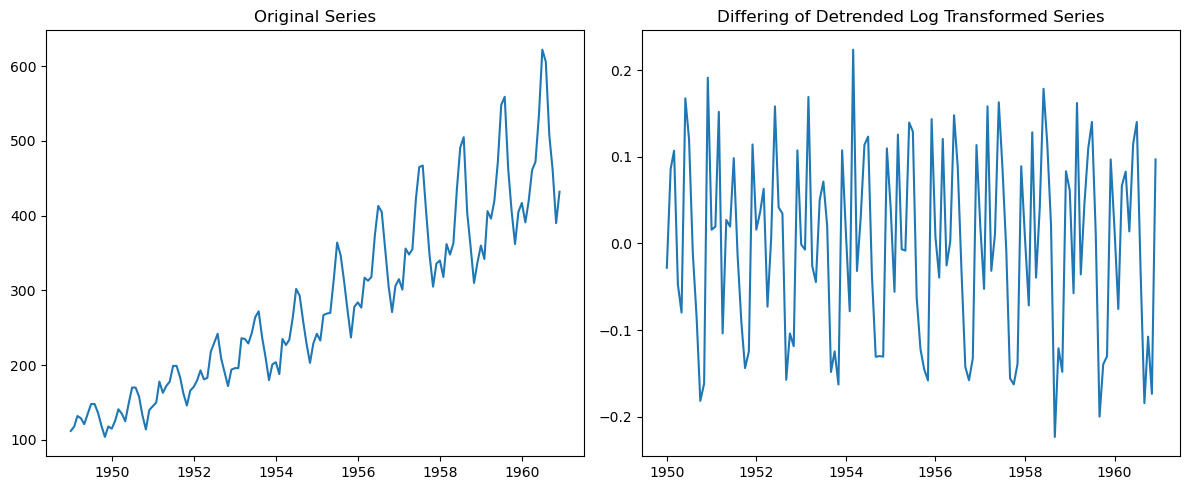

In [46]:
fig, ax = mp.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [20, 20]}, figsize=(12, 5))
ax[0].set_title("Original Series")
ax[1].set_title("Differing of Detrended Log Transformed Series")
ax[0].plot(df['passengers'])
ax[1].plot(detrended_log_transformed_with_differencing)
fig.tight_layout()

In [47]:
stationarity_with_adfuller_checker(detrended_log_transformed_with_differencing)


ADF value is -3.9129812454195174
Critical value is -2.8863625166643136
Rejecting the Null Hypothesis, So the Time-Series is Stationary


## Selecting the Detrended log transformed data with differencing

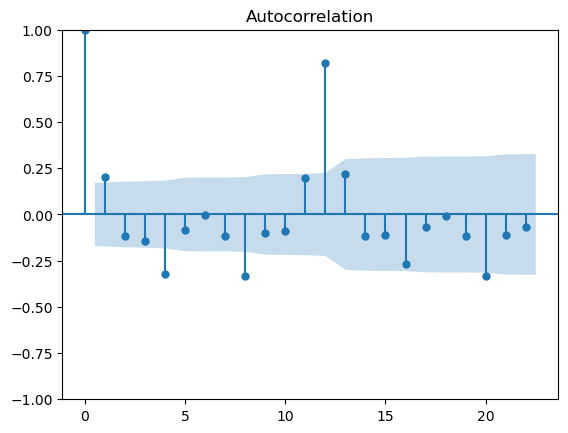

In [48]:
# ploting acf and pacf

plot_acf(detrended_log_transformed_with_differencing);

/home/adminuser/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


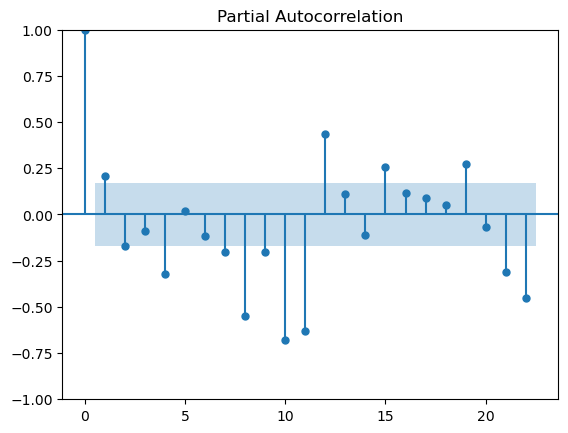

In [49]:
# Pacf

plot_pacf(detrended_log_transformed_with_differencing);

In [71]:
# Just for Completion trying to find the Anamoly using the IsolationForest Algorithm

# Providing a default contamination(default threshold)
isolation_forest_model = IsolationForest(contamination=0.02)
isolation_forest_model.fit(log_transformed_with_differencing)

/home/adminuser/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.02)

In [72]:
outliers=pd.Series(isolation_forest_model.predict(log_transformed_with_differencing)).apply(lambda x:"yes" if (x==-1) else "No")

In [80]:
outliers.index = log_transformed_with_differencing.index
log_transformed_with_differencing["outliers"] = outliers

In [81]:
log_transformed_with_differencing

,passengers,outliers
Month,,
1949-02-01,0.052186,No
1949-03-01,0.112117,No
1949-04-01,-0.022990,No
1949-05-01,-0.064022,No
1949-06-01,0.109484,No
...,...,...
1960-08-01,-0.026060,No
1960-09-01,-0.176399,No
1960-10-01,-0.097083,No


In [82]:
log_transformed_with_differencing[log_transformed_with_differencing["outliers"]=="yes"]
log_transformed_with_differencing[log_transformed_with_differencing["outliers"]=="yes"].index

,passengers,outliers
Month,,
1950-12-01,0.205444,yes
1954-03-01,0.223144,yes
1958-09-01,-0.223144,yes


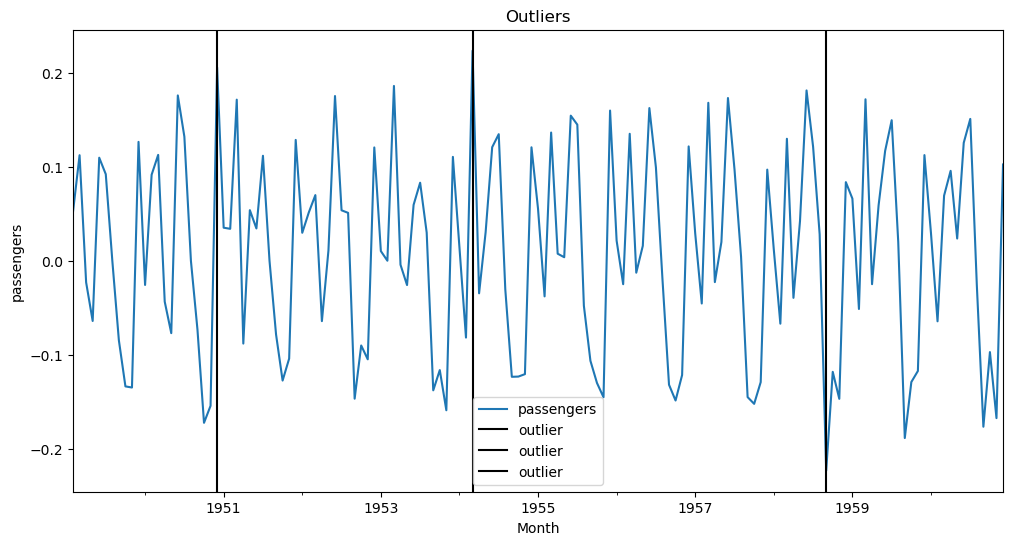

In [122]:
ax = log_transformed_with_differencing.plot(figsize=(12,6))
for xcor in log_transformed_with_differencing[log_transformed_with_differencing["outliers"]=="yes"].index.values:
    ax.axvline(x=xcor, color="black", label="outlier")
    
ax.set_title("Outliers")
ax.set_ylabel("passengers")
ax.legend()